# Membrane under a gaussian-distributed load
Here we use pyiron as the workflow manager, and FEniCS as a finite-element solver to solve Poisson equation for the defelection of the membrane.   
1. First, we define the problem for a single load on a circular membrane with a radius of 1.  
2. Second, we change the width the load, here defined as `beta`, and finally plot the load for each case. 

In [1]:
from pyiron_base import Project
import pyiron_continuum
import numpy as np
import matplotlib.pyplot as plt

### 1. Defining a pyiron project
At first, we define one single job which simulate one single gaussian load and calculate the defelection

In [2]:
pr = Project('membrane')
pr.remove_jobs(silently=True)

0it [00:00, ?it/s]

In [3]:
job = pr.create.job.Fenics('mem_default')

/home/tjogi/DigiStahl/pyiron_continuum/pyiron_continuum/fenics/job/generic.py:122: UserWarning: Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file. This includes the domains, boundary condition, spatial functions. Therefore, it is not possible to reload the job properly, from HDF5 file. It would be safe to remove the Fenics jobs, after defining the project.
  warnings.warn("Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file."


In [4]:
job.input

DataContainer({'mesh_resolution': 2, 'element_type': 'P', 'element_order': 1, 'n_steps': 1, 'n_print': 1, 'dt': 1, 'solver_parameters': {}})

### 2. Defining a circular domain

In [5]:
job.domain = job.create.domain.circle((0, 0), 1)

In [6]:
help(job.create.domain.circle)

Help on method circle in module pyiron_continuum.fenics.factory:

circle(center, radius) method of pyiron_continuum.fenics.factory.DomainFactory instance



### 3. Generating the mesh

In [7]:
job.input.mesh_resolution = 64
job.input.element_type = 'P'
job.input.element_order = 2

**Visualizing the mesh**

In [8]:
job.mesh

### 4. Defining the boundary condition 
Here it is assumed that the boundary of the membrane is fixed and therefore the deflection is zero at the boundary

In [9]:
job.BC = job.create.bc.dirichlet(job.Constant(0))

### 5. Defining the gaussian load
The gaussian expression is defined with parameter `beta` and `R0`, where `beta` specifies the width of the gaussian expression. One can change this width using `p.beta =<new value>`

In [10]:
beta = 8
R0 = 0.6
p = job.Expression(
    '4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',
    degree=1, beta=beta, R0=R0
)

### 6. Defining the variational formulation of Poisson equation
Here `u` represents the deflection and `v` is the test function.

In [11]:
job.LHS = job.dot(job.grad_u, job.grad_v) * job.dx
job.RHS = p * job.v * job.dx

### 7. Running the job

In [12]:
job.run()

The job mem_default was saved and received the ID: 13
Solving linear variational problem.


In [13]:
type(job.u)

dolfin.function.function.Function

### 8. Visualizing the deflection

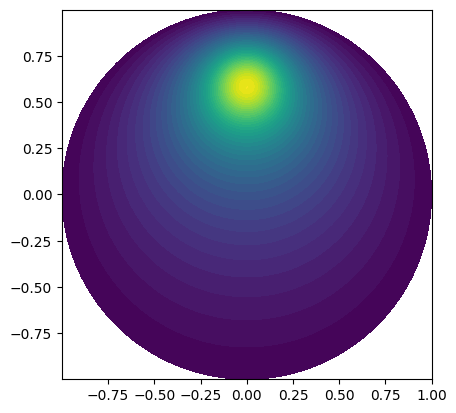

In [14]:
job.plot.solution()

## Defining multiple jobs
Here we define multiple job for various `beta`, and solve Poisson equation for each loading.

In [16]:
betas=[5,6,8,10]
tol = 0.001
y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y]
w_line = [] 
p_line = []
for beta in betas:
    p.beta = beta;
    job_name="mem_{}".format(beta) 
    pr.remove_job(job_name)
    
    job_beta = pr.create.job.Fenics("mem_{}".format(beta))
    job_beta.input.mesh_resolution = 64
    job_beta.input.element_type = 'P'
    job_beta.input.element_order = 2
    job_beta.domain = job.create.domain.circle((0, 0), 1)
    job_beta.BC = job_beta.create.bc.dirichlet(job_beta.Constant(0))
    
    job_beta.LHS = job_beta.dot(job_beta.grad_u, job_beta.grad_v) * job_beta.dx
    p.beta = beta
    job_beta.RHS = p * job_beta.v * job_beta.dx
    
    job_beta.run()

    w_line.append(np.array([job_beta.solution(point) for point in points]))
    p_line.append(np.array([p(point) for point in points]))

2024-05-23 13:24:09,373 - pyiron_log - WARNING - Job 'mem_5' does not exist and cannot be loaded
2024-05-23 13:24:09,374 - pyiron_log - WARNING - Job 'mem_5' does not exist and could not be removed
/home/tjogi/DigiStahl/pyiron_continuum/pyiron_continuum/fenics/job/generic.py:122: UserWarning: Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file. This includes the domains, boundary condition, spatial functions. Therefore, it is not possible to reload the job properly, from HDF5 file. It would be safe to remove the Fenics jobs, after defining the project.
  warnings.warn("Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file."


The job mem_5 was saved and received the ID: 14
Solving linear variational problem.


2024-05-23 13:24:09,933 - pyiron_log - WARNING - Job 'mem_6' does not exist and cannot be loaded
2024-05-23 13:24:09,934 - pyiron_log - WARNING - Job 'mem_6' does not exist and could not be removed
/home/tjogi/DigiStahl/pyiron_continuum/pyiron_continuum/fenics/job/generic.py:122: UserWarning: Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file. This includes the domains, boundary condition, spatial functions. Therefore, it is not possible to reload the job properly, from HDF5 file. It would be safe to remove the Fenics jobs, after defining the project.
  warnings.warn("Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file."


The job mem_6 was saved and received the ID: 15
Solving linear variational problem.


2024-05-23 13:24:10,574 - pyiron_log - WARNING - Job 'mem_8' does not exist and cannot be loaded
2024-05-23 13:24:10,577 - pyiron_log - WARNING - Job 'mem_8' does not exist and could not be removed
/home/tjogi/DigiStahl/pyiron_continuum/pyiron_continuum/fenics/job/generic.py:122: UserWarning: Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file. This includes the domains, boundary condition, spatial functions. Therefore, it is not possible to reload the job properly, from HDF5 file. It would be safe to remove the Fenics jobs, after defining the project.
  warnings.warn("Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file."


The job mem_8 was saved and received the ID: 16
Solving linear variational problem.


2024-05-23 13:24:11,223 - pyiron_log - WARNING - Job 'mem_10' does not exist and cannot be loaded
2024-05-23 13:24:11,224 - pyiron_log - WARNING - Job 'mem_10' does not exist and could not be removed
/home/tjogi/DigiStahl/pyiron_continuum/pyiron_continuum/fenics/job/generic.py:122: UserWarning: Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file. This includes the domains, boundary condition, spatial functions. Therefore, it is not possible to reload the job properly, from HDF5 file. It would be safe to remove the Fenics jobs, after defining the project.
  warnings.warn("Currently, the c++ dolfin functions used by fenics are not stored in the HDF5 file."


The job mem_10 was saved and received the ID: 17
Solving linear variational problem.


Text(0.5, 1.0, 'Deflection/Load along y axis')

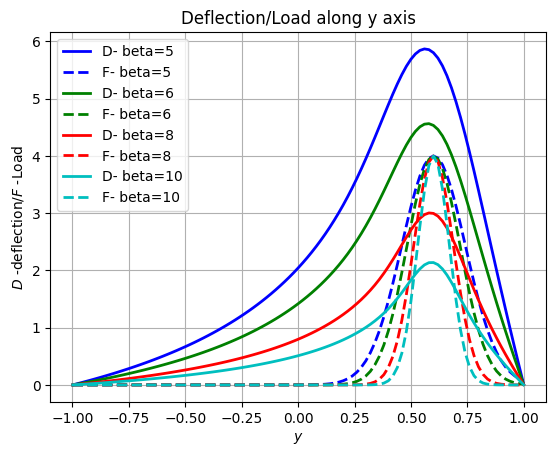

In [17]:
colors=['b', 'g','r', 'c','k']
%matplotlib inline
for color, beta, deflection, pline in zip(colors,betas,w_line, p_line):
    plt.plot(y, 50*deflection, color, linewidth=2, label = 'D- beta={}'.format(beta))  # magnify w
    plt.plot(y, pline,  color+'--', linewidth=2, label = 'F- beta={}'.format(beta))

plt.grid(True)
plt.xlabel('$y$')
plt.ylabel('$D$ -deflection/$F$ -Load')
plt.legend( loc='upper left')
plt.title("Deflection/Load along y axis")